### Pytorch

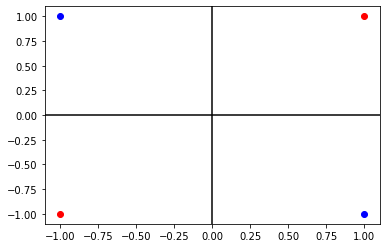

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# input of the MLP
X = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output of the MLP
y = np.array([[0], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(X[i][0], X[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [2]:
import tensorflow as tf 
# XOR dataset 
XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]] 
XOR_Y = [[0], [1], [1], [0]] 
 
num_input = 2 
num_classes = 1 
 
# Define model I/O (Placeholders are used to send/get information from graph) 
x_ = tf.placeholder("float", shape=[None, num_input], name='X') 
y_ = tf.placeholder("float", shape=[None, num_classes], name='Y') 
 
# Model structure 
H1 = tf.layers.dense(inputs=x_, units=4, activation=tf.nn.sigmoid) 
H2 = tf.layers.dense(inputs=H1, units=8, activation=tf.nn.sigmoid) 
H_OUT = tf.layers.dense(inputs=H2, units=num_classes, activation=tf.nn.sigmoid) 
 
# Define cost function 
with tf.name_scope("cost") as scope: 
   cost = tf.losses.log_loss( labels=y_, predictions=H_OUT) 
   # Add loss to tensorboard 
   tf.summary.scalar("log_loss", cost) 
 
# Define training ops 
with tf.name_scope("train") as scope: 
   train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost) 
 
merged_summary_op = tf.summary.merge_all() 
 
# Initialize variables(weights) and session 
init = tf.global_variables_initializer() 
sess = tf.Session() 
# Configure summary to output at given directory 
writer = tf.summary.FileWriter("./logs/xor_logs", sess.graph) 
sess.run(init) 
 
# Train loop 
for step in range(10000): 
   # Run train_step and merge_summary_op 
   _, summary = sess.run([train_step, merged_summary_op], feed_dict={x_: XOR_X, y_: XOR_Y}) 
   if step % 1000 == 0:        
       print("Step/Epoch: {}, Loss: {}".format(step, sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))) 
       # Write to tensorboard summary 
       writer.add_summary(summary, step)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

Step/Epoch: 0, Loss: 0.7050517201423645
Step/Epoch: 1000, Loss: 0.6931444406509399
Step/Epoch: 2000, Loss: 0.6930137872695923
Step/Epoch: 3000, Loss: 0.6928640604019165
Step/Epoch: 4000, Loss: 0.6926282644271851
Step/Epoch: 5000, Loss: 0.6921644806861877
Step/Epoch: 6000, Loss: 0.6909925937652588
Step/Epoch: 7000, Loss: 0.6866075396537781
Step/Epoch: 8000, Loss: 0.6559198498725891
Step/Epoch: 9000, Loss: 0.31516700983047485
